**<font size=48>Lab Enchancement 4</font>**<br>

By Lim Sir Yuean and Yap Jack


Learning objectives:
- Understand the applications of calculus and linear algebra (computational methods) in Machine Learning.
- Train a Convolutional Network Model.

References:
- https://www.youtube.com/watch?v=DOXbE4hMF4Y
- https://www.youtube.com/watch?v=nEvKduLXFvk&t
- https://techntales.medium.com/eigenvalues-and-eigenvectors-and-their-use-in-machine-learning-and-ai-c7a5431ae388#:~:text=In%20machine%20learning%2C%20eigenvalues%20and,natural%20language%20processing%2C%20and%20robotics.
- https://www.youtube.com/watch?v=WsFasV46KgQ
- https://www.youtube.com/watch?v=TPqr8t919YM
- https://qr.ae/psxSPe
- https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
- https://www.datacamp.com/tutorial/cnn-tensorflow-python
- https://medium.com/analytics-vidhya/how-does-pca-really-work-e53f640e5323
- https://towardsdatascience.com/how-exactly-does-pca-work-5c342c3077fe
- https://www.youtube.com/watch?v=MLaJbA82nzk
- https://towardsdatascience.com/using-pca-to-reduce-number-of-parameters-in-a-neural-network-by-30x-times-fcc737159282

<b>Foreword:</b>

This lab will show how ML models use numbers to see and recognize real life objects using the concepts from calculus and statistics.

Afterwards, we will tie the concepts learnt here to lab 3, and train a convolutional neural network using these mathematical principals.

<b>Why?</b>
- To set a strong foundation for learning top-tier models such as ChatGPT 4.
- To bring these mathematical concept to easily read and understand ML research papers in the future.


## <font color='lightbrown'>Logistic Regression</font>

In lab 3, we are used to predicting numerical numbers from a given set of numerical training data using the Linear Regression method, such as predicting a person's income based on his expenses and salary.

Here in lab 4, we will be trying to <b><u> train an ML model to see based on pictures using Logistic Regression</b></u>.

<font size = 5 color='lightyellow'><u>How does it work?</u></font>

First, we need to understand <b><u>Classification</u></b>, which unlike Linear Regression, has no range of data values to choose from.

Instead, Classification uses labels to make predictions.

There are 4 types of classification methods:
- Binary Classification
- Classification Predictive Modeling
- Multi-Class Classification
- Multi-Label Classification
- Imbalanced Classification

For learning purposes, we will be using Binary Classification. For example, when predicting spam emails, labels such as "spam" or "not spam" will be assigned during the computation process.

Sounds complicated, but this can be achieved by using the <b><u>Sigmoid formula</u></b> concept from Calculus.

<div style="text-align:center">
     <img src="sigmoid_formula.jpg" width="470">
</div>


This formula is critical for classification to work, and in turn Logistic Regression.  

<font size = 5 color='lightyellow'><u>Cool. But how *exactly* does it work?</u></font>

Picture this

<div style="text-align:center">
    <img src="linear_boundary.jpg" width="400"> <img src="sig_vis.jpg" width="570">
</div>


With this image, we calculate the data point using the formula below

<div style="text-align:center">
    <img src="sig_calculation.jpg" width="600">
</div>

<font size = 5 color='lightyellow'><u>Is Sigmoid the only option?</u></font>

No, the Sigmoid formula is only ideal for binary classification because
- The output range is limited to (0,1) interval
- Ability to perform differentiation
- Does not compute error, but it calibrates slightly unreasonable results within the interval that make sense for probablities.

<div style="text-align:center">
    <img src="sig_limit.jpg" width="550"> <img src="sig_modeling.jpg" width="650">
</div>

<div style="text-align:center">
    <img src="cost_optimize.jpg" width="550"> <img src="cos_op_vis.jpg" width="650">
</div>


There are more calculus and statistical formulas being used in ML such as
- softmax (an extension of Sigmoid) for multi-class prediction
- ReLU (a piecewise linear function) for deep neural networks

However, for learning purposes, we will not be touching these 2 methods for now.



<font size = 5 color='lightgreen'>Show us the math!</font>

Given 2 normally distribution for "spam" and "not spam" with any mean and variance.

<div style="text-align:center">
     <img src="normal_dis.png" width="600">
</div>

So when we ask whether the email is a "spam" or "not spam", the data point on the x-axis for parameters will determine it's likelihood.

When combine these two normal distributions by dividing the 2nd normal distribution with the sum of the two normal distributions, it turns into a sigmoid curve. Proving that this method works for binary classification.

<div style="text-align:center">
     <img src="sig_comb.png" width="600">
</div>

The underlying math requires can be seen below, which requires at least 2 normal distribution probabilities.

<div style="text-align:center">
     <img src="math_proof.png" width="800">
</div>

To learn more, check out the desmos interactive graph below

https://www.desmos.com/calculator/hjc4peyxmc

<font size = 4 color='lightskyblue'>Code in action</font>

In [1]:
# create synthetic dataset
import pandas as pd

data = {
    'text' : [
        "Congratulations, you've won a free ticket to the Bahamas!",
        "Hi Bob, can we reschedule our meeting to next week?",
        "This is a limited time offer, click now to claim your prize!",
        "Dear customer, your invoice is attached. Please review it.",
        "Exclusive deal just for you. Don't miss out on this opportunity!",
        "Are we still on for lunch tomorrow?",
        "Win a brand new car by entering this contest today!",
        "Hey, can you send me the report by end of the day?",
        "Get rich quick with this simple investment strategy!",
        "Reminder: your doctor's appointment is scheduled for next Monday."
    ],
    'label': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 for spam, 0 for no spam
}

df = pd.DataFrame(data)

df.head()

,text,label
0,"Congratulations, you've won a free ticket to t...",1
1,"Hi Bob, can we reschedule our meeting to next ...",0
2,"This is a limited time offer, click now to cla...",1
3,"Dear customer, your invoice is attached. Pleas...",0
4,Exclusive deal just for you. Don't miss out on...,1


In [2]:
# preprocess the data
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def preprocess_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('','', string.punctuation))
    return text

# apply preprocess function to data
df['text'] = df['text'].apply(preprocess_text)

# vectorize the preprocessed data
vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df['text'])

# create instance of target variable
y = df['label']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 100 )

In [3]:
# train the logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [4]:
# evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# make predictions
y_pred = model.predict(X_test)

# evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1 Score: 0.6666666666666666


As you can see, the model only has an accuracy of 50% due to the small dataset. To further improve the model, we can create a larger dataset and do some feature engineering.

<u>Precision</u>: detect false positive data

<u>Recall</u>: detect actual postive data from all the false positive data

<u>F1 Score</u>: the average of precision and recall

## <font color='lightpink'>Convolutional Neural Networks</font>

Convolutional Neural Networks (CNNs) are specialized in detecting objects in images. Although its an improved version of neural networks, CNNs is able to detect certain features from an image.

For example, we have a picture of a dog playing with a ball. Now, for the ML model to detect the ball, it would have to learn the difference between a dog and a ball to detect it. This is the specialty of CNNs.

<div style="text-align:center">
    <img src="ball.png" width="400">
</div>

<font size = 5 color='lightyellow'><u>How does it work?</u></font>

For a CNN to work, it would need to use <b><u>filters</u></b>. Filters are represented by matrices with the data embbeded to detect the object.


<div style="text-align:center">
    <img src="ball_matrix.png" width="400">
</div>

Of course, we can use more than 1 filters to make it even more accurate.

Once, the filter is applied to the image data, the data will be parsed into a neural network and make a prediction.

With this concept, you might recognize the popular but vague graphs about CNN such as the one below.

<div style="text-align:center">
    <img src="cnn_graph.png" width="700">
</div>

<font size = 5 color='lightyellow'><u>Cool, but how *exactly* does it work?</u></font>

The process of transforming the data with filters is called <b><u>"Convolution"</u></b>, thus, "Convolutional Neural Network.

Once the filter applied data is trained, it will update the filter again using gradient descent explained in lab 3.

Each filter is independently applied to the input image data, and each filter learns a pattern.

To explain how this process is done, we will have to look at the math.



<div style="text-align:center">
    <img src="convoluted.gif" width="500">
</div>

<font size = 5 color='lightgreen'>Show us the math!</font>

Once these computations are done, it is applied with gradient descent to make a prediction.

<div style="text-align:center">
    <img src="cnn_matrix_work.jpg" width="500">
</div>
<div style="text-align:center">
    <img src="cnn_work_2.jpg" width="500">
    
</div>
<div style="text-align:center">
    <img src="cnn_work_3.jpg" width="500">
</div>

<font size = 4 color='lightskyblue'>Code in action</font>

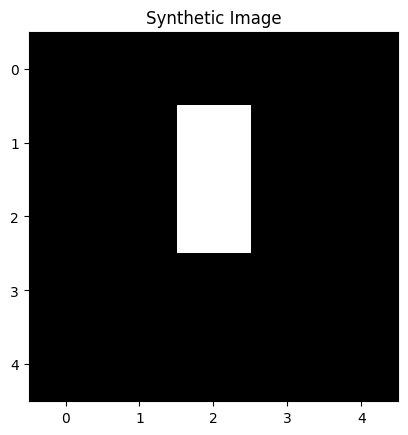

In [5]:
# create dataset

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

data = torch.tensor([
    [1, 1, 1, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 2, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

plt.imshow(data.squeeze().numpy(), cmap='gray')
plt.title('Synthetic Image')
plt.show()

In [6]:
# define a CNN model
# filter can also be called kernal

class CNN(nn.Module):
    def __init__(self, kernel):
        super(CNN, self).__init__()
        # initialize convolutional layer with a kernal
        self.conv = nn.Conv2d(1, 1, kernel_size=3, bias=False)
        # set the weights of the convolutional layer to the predefined kernel
        self.conv.weight = nn.Parameter(kernel)

    def forward(self, x):
        return self.conv(x)

# Define the filter (kernel) to detect the ball pattern
kernel = torch.tensor([
    [0, 2, 0],
    [0, 2, 0],
    [0, 0, 0]
], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

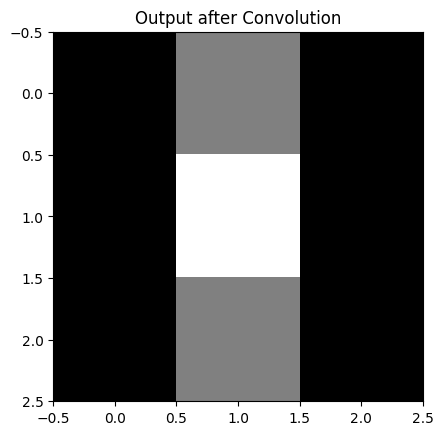

Output Matrix:
[[4. 6. 4.]
 [4. 8. 4.]
 [4. 6. 4.]]


In [7]:
# perform computation on the data using CNN model

model = CNN(kernel)

# forward pass the data into the model
output = model(data)

output_image = output.squeeze().detach().numpy()
plt.imshow(output_image, cmap='gray')
plt.title('Output after Convolution')
plt.show()

print("Output Matrix:")
print(output_image)

## <font color='cyan'>CNN demo model</font>

To put what we learnt into practice, we will be making a demonstration model for CNN using Tensorflow as our main library

In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, classification_report
print("TensorFlow version:", tf.__version__)

<font size = 5 color='lightyellow'><u>Load Dataset</u></font>


In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


To quickly have enough images to train, we will be using the CIFAR-10 dataset for training
- It contains 60.000 32 by 32 color images
- The dataset has 10 different classes
- Each class has 6000 images
- There are overall 50.000 training images
- Overall 10.000 testing images

Note: when running on a local machine, the download of this dataset may take longer. (ETA: 2 hours+)

<font size = 5 color='lightyellow'><u>Exploratory Data Analysis</u></font>


We will take a look at some of the images and their attributes such as training images, class names, and training labels before training.

In [15]:
import matplotlib.pyplot as plt

def show_images(train_images,
            	class_names,
            	train_labels,
            	nb_samples = 12, nb_row = 4):

    plt.figure(figsize=(12, 12))
    for i in range(nb_samples):
        plt.subplot(nb_row, nb_row, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

Then, we can call the class names for a few of the images

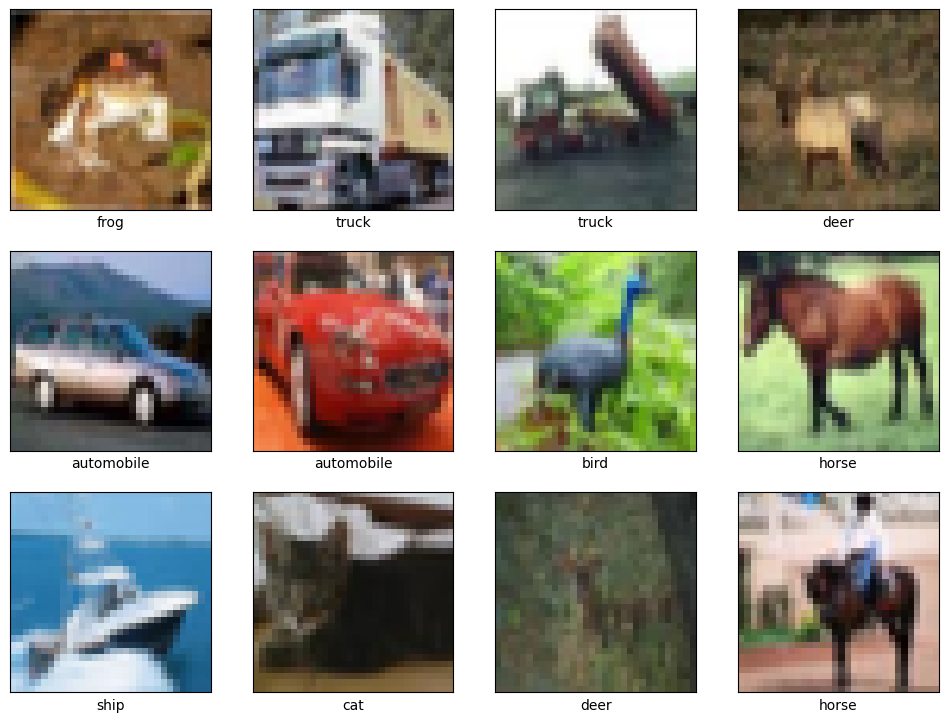

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           	'dog', 'frog', 'horse', 'ship', 'truck']

show_images(train_images, class_names, train_labels)

<font size = 5 color='lightyellow'><u>Data Preprocessing</u></font>

Before training the images, we should normalize the pixel values of the images so the CNN can detect the patterns faster.

This is technically called ensuring scale invariance and speeding up convergence during the training process.

In [17]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

Since CNN only takes in numerical values instead of categorical values, we will be using one of tensorflow's library functions to convert categorical class names into numerical format.

In [18]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

<font size = 5 color='lightyellow'><u>Data Modelling</u></font>

Here, we can finally initiate the CNN model from the Tensorflow library using Sequential and other filter functionalities.

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (32, 32, 3)
FILTER1_SIZE = 32
FILTER2_SIZE = 64
FILTER_SHAPE = (3, 3)
POOL_SHAPE = (2, 2)
FULLY_CONNECT_NUM = 128
NUM_CLASSES = len(class_names)

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE, activation='relu'))
model.add(MaxPooling2D(POOL_SHAPE))
model.add(Flatten()) # part of PCA
model.add(Dense(FULLY_CONNECT_NUM, activation='relu')) # logistic  regression method
model.add(Dense(NUM_CLASSES, activation='softmax'))

After initializing the model, we can examine the model's architecture with information about each layer, its type, output shape, and total number of trainable parameters.



In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

The summary of the model above indicates that the model is indeed CNN initiated with 2 convolutional layers and its trainable parameters are (315, 722).

The first convolutional layer will apply 32 filters of size 3x3 each and a ReLU activation function. And the second one applies 64 filters of size 3x3.

The first and second pooling layer will apply 2x2 max pooling to reduce the spatial dimensions of the input data such as width and height while retaining the most important features.

The dense layer take in inputs from the previous layer for 128 units and activate the ReLU function (A special kind of logistic regression called "rectified linear activation function").

The final dense layer will contain outputs of 10 units corresponding to the 10 classes using softmax logistic regression to generate the probability and predict those 10 classes.

<font size = 5 color='lightyellow'><u>Model Training</u></font>

Now that all the components are ready, its time to train the CNN model.

Note: The time for training the CNN model varies on a local machine or cloud platform. Some may take longer than usual

In [23]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 30

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='adam',
          	loss='categorical_crossentropy',
          	metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=EPOCHS, batch_size=BATCH_SIZE,
                	validation_data=(test_images, test_labels))

Epoch 1/30
1563/1563 [==============================] - 104s 65ms/step - loss: 1.4024 - accuracy: 0.4999 - precision: 0.7246 - recall: 0.2814 - val_loss: 1.1713 - val_accuracy: 0.5844 - val_precision: 0.7480 - val_recall: 0.4191
Epoch 2/30
1563/1563 [==============================] - 95s 61ms/step - loss: 1.0397 - accuracy: 0.6366 - precision: 0.7705 - recall: 0.4960 - val_loss: 0.9973 - val_accuracy: 0.6519 - val_precision: 0.7734 - val_recall: 0.5212
Epoch 3/30
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9039 - accuracy: 0.6863 - precision: 0.7967 - recall: 0.5745 - val_loss: 0.9254 - val_accuracy: 0.6811 - val_precision: 0.7763 - val_recall: 0.5883
Epoch 4/30
1563/1563 [==============================] - 79s 50ms/step - loss: 0.8051 - accuracy: 0.7207 - precision: 0.8134 - recall: 0.6267 - val_loss: 0.8957 - val_accuracy: 0.6931 - val_precision: 0.7767 - val_recall: 0.6150
Epoch 5/30
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7208 - 

<font size = 5 color='lightyellow'><u>Model Evaluation</u></font>

Now that the model is trained, we need to validate the model's prediction to ensure that its reliable and usable.

To do that, we will be comparing the performance on both the training and testing datasets by plotting the above metrics usng the show_performance_curve() helper function in two dimensions.

- The horizontal axis (x) is the number of epochs
- The vertical one (y) is the underlying performance of the model.
- The curve represents the value of the metrics at a specific epoch.

In [24]:
def show_performance_curve(training_result, metric, metric_label):

	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]

	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')

	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')

	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')

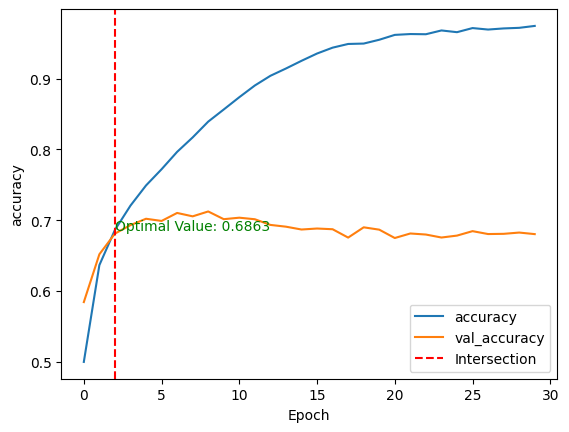

In [25]:
show_performance_curve(training_history, 'accuracy', 'accuracy')

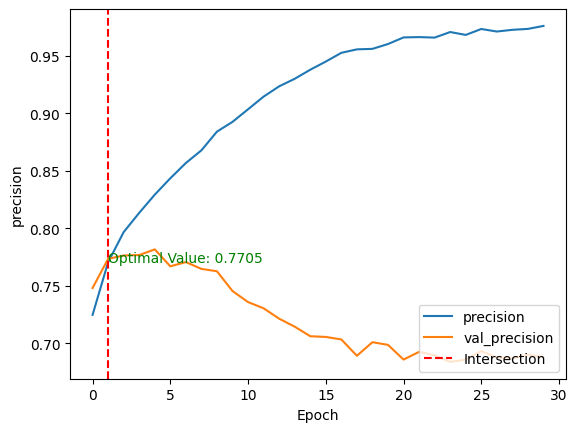

In [26]:
show_performance_curve(training_history, 'precision', 'precision')

After examining the graph above, we can see that without any fine-tuning or pre-processing, the model has an accuracy score of aboout 67% out of every 100 samples, and a precision of about 77% out of each postive predictions (correct predictions) with the remaining 23 are false positives (incorrect predictions).

Although a good range of accuracy is between 70% to 90%, the scores omitted by this model is not bad, but it could be better.

These scores indicates the model's predictions are moderately reliable. By studying these score metrics, we will have a really good idea as to how capable our CNN model is.

To further validate the model's prediction, we can create a confusion matrix to show the number of correct and wrong predictions made by the model.

313/313 [==============================] - 9s 25ms/step


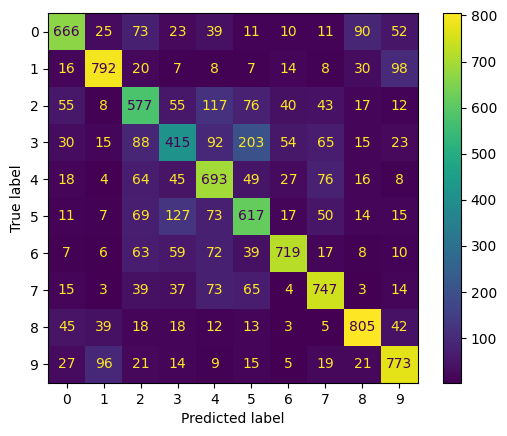

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_predictions = model.predict(test_images)

test_predicted_labels = np.argmax(test_predictions, axis=1)

test_true_labels = np.argmax(test_labels, axis=1)

cm = confusion_matrix(test_true_labels, test_predicted_labels)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

The confusion matrix above shows that class label 1, 6, 7, 8, 9 has the highest values at the diagonal. Indicating that the current model is better at predicting those classes

On the other hand, the model seems to struggle with rest of the remaining classes.

The classes with the highest off-diagonal values are those the model confuses the good classes with. Such the the predicated label 1 (class 2) and True Label 9 (class 10) are being confused by the model.

🎉 Congratulations! you now know how to teach machines to see by using MATH!


## <font color='cyan'>Principal Component Analysis</font>

As a bonus, this lab will explain one of the most used technique in the ML industry called Principal Component Analysis (PCA).

In the previous model, we have used a functionality called "Flatten". What it does is to reshape a 2-dimensional image data into 1-dimensional image data, effectively "flattening" the image.

<div style="text-align:center">
    <img src="pca_1.jpg" width="400"> 
</div>

<font size = 5 color='lightyellow'><u>What does it do?</u></font>

This method is usally used to overcome overfitting when training a model. It extracts the most important features for the model, so the biases don't completely dominate its predictions

<font size = 5 color='lightyellow'><u>How does it work?</u></font>

PCA is the process of compressing a lot of data into something that captures the essence of the data.

However, This process is often done through the use of linear algebra principles such as Eigenvalues and Eigenvectors. 

When programming, instead of implementing from scratch, PCA is an unsupervised algorithm built and ready to use from a library.



<font size = 5 color='lightgreen'>Show us the math!</font>

<div style="text-align:center">
    <img src="pca_2.jpg" width="400"> <img src="pca_3.jpg" width="400"> <img src="pca_4.jpg" width="400"> <img src="pca_5.jpg" width="400"><img src="pca_6.jpg" width="400"><img src="pca_7.jpg" width="400"> <img src="pca_8.jpg" width="400">              
</div>

<font size = 4 color='lightskyblue'>Code in action</font>

We will be using MNIST digits to demonstatre how PCA works with tangible results.

<font size = 4><u>Find how much PCA can retain information about our data </u></font>

Before applying PCA on our data, its crucial to see how much information we should retain without completely altering our data

11490434/11490434 [==============================] - 0s 0us/step


Text(0, 0.5, 'Explained variance')

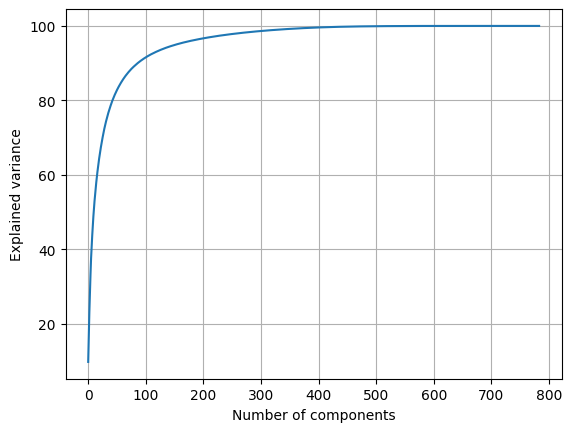

In [28]:
# acquire MNIST data through Keras API
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# reshape (flatten) data before PCA
import numpy as np

train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))

# normalize data before PCA
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# apply PCA once to
# select the best number of components
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# define PCA with a test size component we are trying to reduce
pca_784 = PCA(n_components=784)
pca_784.fit(train_images)

plt.grid()
plt.plot(np.cumsum(pca_784.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')



The graph above shows that by resizing our image data by 7.84 times in dimensions, we can retain approximately 90% of its variability. Showing most of its meaningful data will still remain even after resized.

<font size = 4><u>Apply PCA on the image dataset</u></font>

In [29]:
# apply PCA again with 100 components
# about 90% of the variability retained
# transformation is applied to both
# train and test sets
pca_100 = PCA(n_components=100)
pca_100.fit(train_images)
train_images_reduced = pca_100.transform(train_images)
test_images_reduced = pca_100.transform(test_images)

# verify shape after PCA
print("Train images shape:", train_images_reduced.shape)
print("Test images shape: ", test_images_reduced.shape)

# get exact variability retained
print("\nVar retained (%):",
      np.sum(pca_100.explained_variance_ratio_ * 100))

Train images shape: (60000, 100)
Test images shape:  (10000, 100)

Var retained (%): 91.42388


As you can see with the results above, we have reduced the dimensionality of the original image data by 7.84 times while retaining 91.42% variability in the original data.

Below is the results of using the PCA. As you can see, even when the images have been compressed, the PCA has retained most of the important information from the dataset and it is still recognizable to the human eye

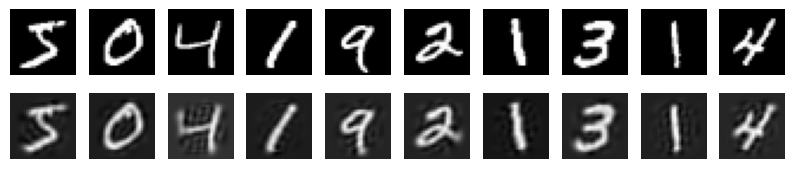

In [30]:
# Apply inverse transform to get reconstructed images
train_images_reconstructed = pca_100.inverse_transform(train_images_reduced)
test_images_reconstructed = pca_100.inverse_transform(test_images_reduced)

# Reshape the images back to 28x28
train_images_reconstructed = train_images_reconstructed.reshape(-1, 28, 28)
test_images_reconstructed = test_images_reconstructed.reshape(-1, 28, 28)

# Plot some of the reconstructed images
num_images_to_display = 10  # Number of images to display
plt.figure(figsize=(10, 2))

for i in range(num_images_to_display):
    # Original image
    ax = plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, num_images_to_display, i + 1 + num_images_to_display)
    plt.imshow(train_images_reconstructed[i], cmap='gray')
    ax.axis('off')

plt.show()
